### Statistical and Stochastic Methods in Hydrology;  Lecture 3: Properties of Random Variables



*Outline for the day*

* Review Lecture 2
* Discrete Distributions in Earth Sciences
    - Hypergeometric distribution
    - Bernoulli Trials (Binomial distribution & Geometric distribution & Negative Binomial distribution)
    - Poisson Process and distribution
* Wrap-up review


Review of Lecture 2: Main Descriptors of Random Variables
-------------------------------------------------------------

The $p.m.f.$ and $c.d.f.$ provide useful tools for describing the
probability properties of a random variable, however, there are some
general characteristics that are also of interest. These include:

-   the *central* or *Expected Value*
-   the *Variance*

**keep in mind that two random variables may have the
same mean, median, or otherwise, but their probability distributions may
be quite different.**

### Expected Value of a Random Variable

#### Discrete Case & Continuous Case

The expected value, expectation, or mean of a *discrete* random variable with a
**probability mass function**, $ P(X = x_i ) = p_i$ is:

$$E(X) = \sum_x {p_i  x_i}$$

For the *continuous* case, the expected value is simply the integral of
the $p.d.f.$:

$$E(X) = \int_{-\infty}^\infty {x \cdot f(x)dx}$$

Some notes for when we cover the *Method of Moments* - The expected
value of $(x- \mu)^i$ is equal to the $i^{th}$ central moment
$E[(x- \mu)^i ] = μ_i$ ; later on we will show that when $i = 2$, $μ_i$
is the variance.

-   The expected value of $x^i$ is equal to the $i^{ th}$ moment about
    origin $E[x^i ] = μ_i$

### Measures of Central Tendency

* Arithmatic Mean
* Geometric Mean
* Weighted Mean
* Median
* Mode

### Measures of Dispersion

* Range
* Variance

Variance provides a more robust measure of the variability of a
population. The variance is a non-negative number given us insight into
how widely distributed the values of the random variable are likely to
be. If we have very high variance, it decreases the 'chance' that we
will draw the central value. In other words, the $x_i$ are more
scattered within the the distribution. Think of *Variance* \~
*variability*. We symbolize variance with $Var(X) \ or \ V(X)$ or
$\sigma^2$

$$V(X) = \sigma^2 = E[X-E(X)]^2 = E(x-\mu)^2 = \int (x-\mu)^2 f(x)dx$$

Note that the variance is also the **second central moment** or , $u_2$.

* Coefficient of Variation

### Measures of Symmetry

* Skewness
* Kurtosis


Lecture 3: Discrete Distributions
-------------------------------------------------------------

What is it that we are trying to accomplish with the *Descriptors of a Random Variable*? You may have a variable in your model for which you don't have actual data and cannot derive from first principles (e.g. physical processes). It may be that our variable would be too complex to model, or we simply don't have a model for it. Hopefully, however, you have some information on this variable, and perhaps that comes in the form of a *distribution*. The *distribution* then, is simply the description of the probability of observation for that variable.

There are some distributions that are well known and used often to help us describe a random variable of interest. The usefulness of the distribution stems from the following reasons: (1) The function is the result of an underlying physical process and is derived on the basis of certain physically reasonable assumptions; (2) the function is the result of some limiting process; and (3) it is widely known and the necessary statistical information is available.

In prior days, before we all had access to computers, these distributions were analytically derived and calculated and the resulting probabilities were made available in the form of tables (yes, like on paper...). These tables were used in calculations -- given a look-up value, one could go to a probability table and find the statistics that were relevant for that value.

Today, we rely on computers. Let's take a look...


## Hypergeometric distribution

We use the hypergeometric function when selecting values from a finite population with binary values (for example "good" and "bad").

The hypergeometric distribution is drawing objects from a bin of $M$ elements.
$M$ is the total number of objects, $n$ is total number of Type I objects in the bin, or you could think of objects with a certain property -- say blue eyes vs. brown eyes. The random variate, $x$ represents the number of Type I objects in $N$ samples drawn without replacement from the total population.


The probability mass function is defined as:

$$f_x(x; M,N,n) = {\binom n x \binom{M-n}{N-x} \over \binom M N }$$


The cumulative distribution function that is defined as:

$$F_x(x; M,N,n) ={ \sum_{i=0}^x \binom n i \binom{M-n}{N-i}\over\binom M N }$$


The $E(x)$, or **expected value** is given by:

$$ E(x) = {n \cdot k\over N}$$


The **variance** is given by:

$$Var(x) ={ n \cdot k(N-k)(N-n)\over N^2 \cdot (N-1)}$$


### Examples


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

We are considering the following:

Assumptions for hypergeometric distribution | 
------------ |
1. There is a population of $M$ items divided into two groups (blue or brown), $n$ of which are belonging to one group (blue) and $M-n$ belong to the other group (brown).|
2. A random sample (without replacement) of $N$ items is taken from the $M$ items.|
3. Probability of getting $x$ successes (blue eyes) in $N$ trials; which is given by $f_x(x; M, N, n)$|

### Rainy days in Uppsala
*Note this is compendium example 3.1*

Historical data show that there are 10 rainy days in June in Uppsala. Assume the rainy days are independent (*is this a fair assumption?*). You want to go to the field for a week to measure rainfall intensity.

a. What is the probability of 4 rainy days in 7 randomly selected days in June?
b. What is the probability that less than 4 of these randomly selected days are rainy?

**Solution**

0.11759504863


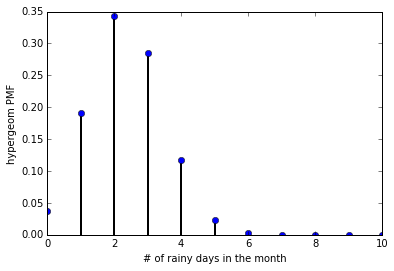

In [3]:
from scipy.stats import hypergeom
[M, n, N] = [30, 10, 7]

rv = hypergeom(M, n, N)
x = np.arange(0, n+1)
f_x = rv.pmf

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, f_x(x), 'bo')
ax.vlines(x, 0, f_x(x), lw=2)
ax.set_xlabel('# of rainy days in the month')
ax.set_ylabel('hypergeom PMF')

print(f_x(4))


0.856763925729


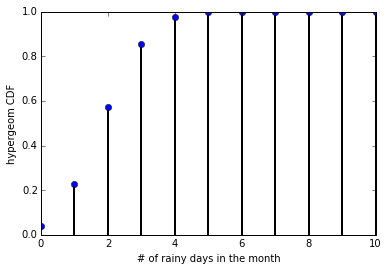

In [4]:
#let's look at case b... cumulative distribution.

F_x = rv.cdf
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, F_x(x), 'bo')
ax.vlines(x, 0, F_x(x), lw=2)
ax.set_xlabel('# of rainy days in the month')
ax.set_ylabel('hypergeom CDF')

# Note that we asked, **less than 4**, so we have to look at the CDF=3
print(F_x(3))

#### Notes on a stackexchange discussion

Below is taken from:

http://stackoverflow.com/questions/11286430/drawing-cards-from-a-deck-in-scipy-with-scipy-stats-hypergeom

In [5]:
"""    scipy.stats.hypergeom.pmf(k, M, n, N)

returns the probability that: from M cards, n of which are marked, if you randomly choose N cards without replacement, exactly k cards will be marked.

So you can get your desired answer (using your variable-names) by
"""
def pick_Q(N, M, Q):
    """
    Given a deck of N cards, where M are marked,
    and Q cards are taken randomly without replacement,
    return the probability that at least one marked card is taken.
    """
    return sum(scipy.stats.hypergeom.pmf(k, N, M, Q) for k in xrange(1,Q+1))

"""
(the sum of the odds that 1 card is marked, 2 cards are marked, 3 cards are marked... N cards are marked).

Luckily, there is a quicker way - the probability that at least one marked card is taken is the flip side of the probability that no marked card is picked. So instead you can do
"""
def pick_Q(N, M, Q):
    """
    Given a deck of N cards, where M are marked,
    and Q cards are taken randomly without replacement,
    return the probability that at least one marked card is taken.
    """
    return 1. - scipy.stats.hypergeom.pmf(0, N, M, Q)

"""
For your second question, there don't appear to be any functions that do what you want; however, you can start with
"""
def how_many_to_pick(N, M, prob):
    """
    Given a deck of N cards, M of which are marked,
    how many do you have to pick randomly without replacement
    to have at least prob probability of picking at least one marked card?
    """
    for q in xrange(1, M+1):
        if pick_Q(N, M, q) >= prob:
            return q
    raise ValueError("Could not find a value for q")



**Edit:**

    scipy.stats.hypergeom.cdf(k, M, n, N)

Given a deck of M cards, n of which are marked, picking N randomly without replacement, find the odds that *k or fewer* marked cards are picked. (You can think of this as the integral of .pmf)

Then .sf(k, M, n, N) is the flip side of .cdf - the odds that *more than k* marked cards were picked.

For example,

     k      pmf(k,52,13,4)   cdf(k,52,13,4)   sf(k,52,13,4)
         (exactly k picked)  ( <= k picked)   ( > k picked)
    ---  -----------------  ---------------  --------------
     0       0.303817527      0.303817527      0.696182473
     1       0.438847539      0.742665066      0.257334934
     2       0.213493397      0.956158463      0.043841537
     3       0.041200480      0.997358944      0.002641056
     4       0.002641056      1.000000000      0.000000000

**Edit2:**

actually, this gives another way of writing the pick_Q function - 'picking 1 or more marked cards' can be rephrased as 'picking more than 0 marked cards', so



In [6]:
def pick_Q(N, M, Q):
    """
    Given a deck of N cards, where M are marked,
    and Q cards are taken randomly without replacement,
    return the probability that at least one marked card is taken.
    """
    return scipy.stats.hypergeom.sf(0, N, M, Q)

## Bernoulli Trials

When we are considering events that *may* or *may not* occur, such as, for example, the annual maximum flow of a river exceeding a certain specified flood level, then we can consider the number of events in the sequence *trials*. In general, there will be only two outcomes, and we consider this a Bernoulli Process.

Note that if we consider the exceedence of a flood level, we are considering *the maximum discharge over the year* against the specific level. That is, our trial occurrs once per year and we are going to ask, "What is the probability of the maximum discharge for the year exceeding the flood level?". We are not considering whether at any time, the river will exceed the specified level -- this is a different question.

Our **Bernoulli sequence** is a model that is based on the following assumptions:

1. Each trial has only two possible outcomes: the *occurrence* or *non-occurrence* of an event.
2. The probability of occurrence of the event in each trial is constant.
3. The trials are statistically independent.

In our example, we're assuming then that the likelyhood of the river's maximum discharge exceeding the specified flood level from one year to the next is independent, and each year the probability of exceeding the flood level is constant, then *the annual maximum floods over a series of years* constitutes a *Bernoulli sequence*.

There are a few distributions that we use to work with the Bernoulli sequence. The main ones are the **binomial** distribution, the **geometric** distribution, and the **negative binomial** distribution. To understand how these are used, it is best to understand the underlying assumptions for each type of distribution.

### Binomial distribution
The *Bernoulli sequence*, named after [James Bernoulli](https://en.wikipedia.org/wiki/Jacob_Bernoulli) is one of the simplest but most important random processes in probability.

Assumptions for binomial distribution | 
------------ |
1. There are n trials, each classifiable as 'success' or 'failure' |
2. The trials are independent (draw a sample *with* replacement, __which is different from hypergeometric__) |
3. Probability of getting $x$ successes (elements with property $k$) is $n$ trials? |

**Note: our notebooks are currently unable to render the math code below, see the compendium**

The $p.m.f.$ has the general form:

$$f_x(x; n, p) = \binom n x p^x q^{n-x}$$

Where $x$ is the number of successes, $n$ is the number of trials, and $p$ is the probability of one success. 

The $c.d.f.$ has the form:
    
$$F_x(x; n,p) = \sum_{x=0}^x \binom n i p^i q^{n-i}$$
    
The $E(x)$ is given by:

$$ E(x) = np$$

and:

$$Var(x) =npq$$

We can also calculate a **coefficient of skewness**:

$$\gamma_x = {p-q\over \sqrt{npq}}$$


### Examples


### Runoff Exceedence
*Note this is compendium example 3.5*

The probability of runoff exceeding a certain limit for any given year is $p$. Suppose the exceedance of runoff in any year is independent.

a. What is the probability the runoff will exceed this limit once in three years?

**Solution**

This is an analytical question, as you would require the value of $p$ the calculate it. So, let's take a look at the analytical solution:

Let $q=1-p$ be the probability of runoff **not** exceeding its limit in a year.

Also, let's look back at keywords in the question, "**once in three years**". So, there we've already established that this 'event' is only going to happen one time. 
Then we have three possible arrangements that give us probabilities of events

$pqq$ (exceed in year 1), $qpq$ (exceed in year 2), and $qqp$ (exceed in year three)

Now recall, from Lecture 1 that the joint probability of three independent events is simply $P(A \cup B \cup C) = P(A) + P(B) + P(C)$, since in any one year the maximum discharge can exceed ($p$) or *not exceed* ($q$) the flood limit.

Let's call event a, the probability of exceeding one time in 3 years. Then we have:
$$P(a) = pqq + qpq + qqp = 3pq^2$$

A more general form:

$$P(a) = \binom 3 1 p^1 q^{3-1} = {3!\over1!(3-1)!} p^1q^2 $$


### Balls in a box
*Note this is compendium example 3.6*

A box contains 1000 balls, of which 200 are red balls. Let's perform an experiment in such a way that each time a ball is taken from the box in random, its colr is observed and then the ball is put back (*replacement!*). What is the probability of getting 10 red balls in the 100 trials?

**Solution**

Okay, in this case we have some numbers to play with....

0.00336281996958


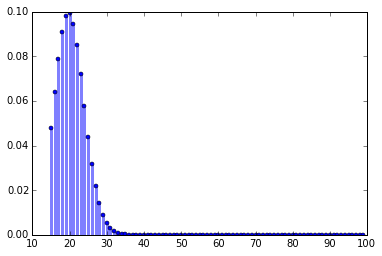

In [16]:
from scipy.stats import binom

#Note the probability mass function for the binomial distribution
#is defined in the "standardized" form, see docs for more details.

n, p = 100, 200/1000.
x = 10

f_x = binom(n, p).pmf

print(f_x(x))

# let's look a bit closer

X = np.arange(binom.ppf(.1, n, p), binom.ppf(1, n, p))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, f_x(X), 'bo', ms=4, label='binom pmf')

ax.vlines(X, 0, f_x(X), colors='b', lw=3, alpha=0.5)

### Hypergeometric and the Binomial

The hypergeometric and binomial distributions have similiarities, and in fact the binomial may be used to approximate the hypergeometric if $N$, sample size, is small compared with $M$ (population). Let's evaluate an example where $N << M$:

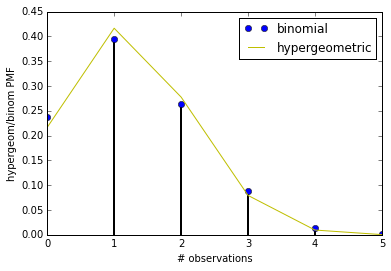

In [8]:
# Example 3.8 in compendium
M, N, n = 40, 5, 10.
p = n/M
X = np.arange(6) 

f_binom = binom(N, p).pmf
f_hypg = hypergeom(M, n, N).pmf

fig = plt.figure()
ax = fig.add_subplot(111)
#X = np.arange(binom.ppf(.1, n, p), binom.ppf(1, n, p))
ax.plot(X, f_binom(X), 'bo', label='binomial')
ax.vlines(X, 0, f_binom(X), lw=2)

ax.plot(X, f_hypg(X), 'y', label='hypergeometric')
ax.set_xlabel('# observations')
ax.set_ylabel('hypergeom/binom PMF')
plt.legend()

### Geometric distribution

We use the geometric distribution when we are interested in the probability of **first** success. Or more generally, we want to know the distribution that governs the number of trials until a 'success' -- or *occurrence* -- happens for the first time. For the *Bernoulli sequence* this is governed by a **geometric distribution**. We will observe that the first occirrence of the event is realized on th $x^th$ trial, then there must be **no** occurrence of this event in any of the prior $(x-1)$ trials. In this case, $X$ is our *random variable*.

$$P(X = x) = pq^{x-1} ; \forall x = 1, 2, 3, ... $$


Assumptions for geometric distribution | 
------------ |
1. There are n trials, each classifiable as 'success' or 'failure' |
2. The trials are independent (draw a sample *with* replacement, __which is different from hypergeometric__) |
3. Probability of the $1^{st}$ success in occurrs on the $x^{th}$ trial? |

**Note: the assumptions #1 and #2 are identical to the binomial distribution, but our question is different.**

The $p.m.f.$ has the general form:

$$f_x(x; p) = pq^{x-1}$$

Where $x$ is the trial number and $p$ is the probability of one success. 

The $E(x)$ is given by:

$$ E(x) = 1/p$$

and:

$$Var(x) =q/p^2$$


### Examples


### A 10-year flood

Compare the binomial and geometric solution to evaluating some questions regarding the 10-year flood:

a. What is the probability that a 10-year flood will occur once in ten years?
*Note there is no matter regarding the sequence timing*, we just want to know **once in ten years**, so we'll use the binomial distribution:

$$f_x(x; n,p) = f_x(1, 10, 0.1) = \binom 10 1 \cdot 0.1^1 \cdot 0.9^9$$

b. What is the probability that a 10 year flood will occur the first time in the 10th year?
*Note, here we have order in the sequence... **first time** is the key word*, so we'll use the geometric distribution:

$$f_x(x; p) = pq^{x-1} $$


In [15]:
from scipy.stats import binom
from scipy.stats import geom

N = 10.
p = 0.1 #ten year flood


f_binom = binom(N, p).pmf
print("""The probability a 10-year flood will occur once in ten years is {0:8.4f}""".format(f_binom(1)))

f_geom = geom(p).pmf
print("""The probability the first occurrence of a 10-year flood will occur on the 10th year is {0:8.4f}""".format(f_geom(10)))


The probability a 10-year flood will occur once in ten years is   0.3874
The probability the first occurrence of a 10-year flood will occur on the 10th year is   0.0387


### negative binomial distribution

We used the geometric distribution when we are interested in the probability of **first** success. Now we may be interested in the time until a subsequent occurrence of the same event. The probability law governing a Bernoulli sequence that provides this information is the *negative binomial* distribution. That is, if $X_k$ is the number of trials until the $k^{th}$ occurrence of the event in a series of Bernoulli trials, then

$$P(X_k = x) = \binom{x-1}{k-1}p^kq^{x-k} ; \forall x = k, k+1, ... $$
$$P(X_k = x) = 0 ; \forall x < k$$


Assumptions for negative binomial distribution | 
------------ |
1. There are n trials, each classifiable as 'success' or 'failure' |
2. The trials are independent (draw a sample *with* replacement, __which is different from hypergeometric__) |
3. The probability that the $k^{th}$ success occurs on the $x^{th}$ trial $(x > k)$ is given by the negative binomial distribution? |

**Note: the assumptions #1 and #2 are identical to the binomial distribution, but our question is different.**



The $p.m.f.$ has the general form:

$$f_x(x; k, p) = \binom{x-1}{k-1}p^kq^{x-k}$$

Where $x$ is the trial number and $p$ is the probability of one success, and $k$ is the occurrence number. 

The $E(x)$ is given by:

$$ E(x) = k/p$$

and:

$$Var(x) =kq/p^2$$


### Examples


### A 10-year flood revisited
What is the probability that the $4^{th}$ occurrence of a 10-year flood will occur on the $40^{th}$ year?
*Note, here we have order in the sequence... but it is not the **first** year*, so we'll use the negative binomial distribution:

$$f_x(40; 4, 0.1) = \binom{39}{3} 0.1^4 0.9^{36} $$


In [10]:
from scipy.stats import nbinom

N = 4.
p = 0.1 #ten year flood


f_nbinom = nbinom(N, p).pmf
print("""The probability a 10-year flood will occur the fourth time (4) on the fortieth year is {}""".format(f_nbinom(40)))



The probability a 10-year flood will occur the fourth time (4) on the fortieth year is 0.018241087638


## Summary of Discrete Distributions

Assumptions for hypergeometric distribution | 
------------ |
1. There is a population of $M$ items divided into two groups (blue or brown), $n$ of which are belonging to one group (blue) and $M-n$ belong to the other group (brown).|
2. A random sample (without replacement) of $N$ items is taken from the $M$ items.|
3. Probability of getting $x$ successes (blue eyes) in $N$ trials is governed by a *hypergeometric distribution* with a $p.m.f.$: $$f_x(x; M,N,n) = {\binom n x \binom{M-n}{N-x} \over \binom M N }$$ |




Assumptions for binomial distribution | 
------------ |
1. There are n trials, each classifiable as 'success' or 'failure' |
2. The trials are independent (draw a sample *with* replacement, __which is different from hypergeometric__) |
3. Probability of getting $x$ successes (elements with property $k$) is $n$ trials is governed by the *binomial distribution* with a $p.m.f.$: $$f_x(x; n, p) = \binom n x p^x q^{n-x}$$ |




Assumptions for geometric distribution | 
------------ |
1. There are n trials, each classifiable as 'success' or 'failure' |
2. The trials are independent (draw a sample *with* replacement, __which is different from hypergeometric__) |
3. Probability of the $1^{st}$ success in occurrs on the $x^{th}$ trial is governed by the *geometric distribution* with a $p.m.f.$: $$f_x(x; p) = pq^{x-1}$$ |




Assumptions for negative binomial distribution | 
------------ |
1. There are n trials, each classifiable as 'success' or 'failure' |
2. The trials are independent (draw a sample *with* replacement, __which is different from hypergeometric__) |
3. The probability that the $k^{th}$ success occurs on the $x^{th}$ trial $(x > k)$ is governed by the *negative binomial distribution* with a $p.m.f$: $$f_x(x; k, p) = \binom{x-1}{k-1}p^kq^{x-k}$$ |

### Poisson Distribution

There is one last distribution we must include with our discussion of discrete random variables... but note, it's a bit of a 'trick'. As hydrologists, or even most earth system scientists in general, our interests are in continuous processes, not discrete processes. We may want to know, at any time, when might we expect a discharge exceeding a certain limit. Or where is the soil moisture along a gradient likely to be a certain value. These space-time problems could be modeled with a Bernoulli sequence if we allow the interval of time (or space) to become small enough and assume that within each interval it is a binomial event (occurs / doesn't occur). But if the event may occur more than once within any given interval of time (or space), then it is better modeled using a **Poisson Process**.



Assumptions for poisson distribution | 
------------ |
1. An event may occur at any time or any point in space |
2.The occurrence(s) of an event in a given time (or space) interval is independent of that in any other nonoverlapping intervals |
3. The probability of occurrence of an event in a small interaval $\Delta t$ is proportional to $\Delta t$, and can be given by $\gamma \Delta t$, where $\gamma$ is the mean rate of occurrence of the event (assumed constant); and the probability of two or more occurrences in $\Delta t$ is negligible. We can model this with: $$P(X=x) = f_x(x; \gamma) = {(\gamma t)^x\over x!} e^{-\gamma t} $$ |


The trick is that we've essentially compressed the Bernoulli process interval. If we assume $\gamma = np$, then we can model this Bernoulli process as a *Poisson sequence* which is computationally favorable.

Let's repeat everything one more time. Consider a Bernoulli process defined over an interval of time (or space) so that $p$ is the probability that an event may occur during the time interval. If the time interval is allowed to become shorter and shorter so that the probability, $p$, of an event occurring in the interval gets smaller and smaller and the number of trials, $n$, increases in such as fashion that $np$ remains constant, then the expected number of occurrence in any toital time interval remains the same.

The $p.m.f.$ has the general form:

$$P(X=x) = f_x(x; \gamma) = {(\gamma t)^x\over x!} e^{-\gamma t} $$

Where $x$ is the event number and $p$ is the probability of one success, and $\gamma$ is Poisson parameter. 

The $E(x)$ is given by:

$$ E(x) = \gamma $$

and:

$$Var(x) = \gamma$$


### Examples
*Compendium examples 3.12 & 3.13*
Calculate the probability that a 100-year flood will occur once in 20 years.

**Solution**

__Binomial__: $f_x(x; n, p) = f_x(1; 20, 0.1) = \binom{20}{1} \cdot 0.01^1 \cdot 0.99^19 = 0.16$

__Poisson__: $f_x(x; \gamma) = f_x(1; 0.2) = 0.2^1 e^{-0.2} / 1! \approx 0.16$

Calculate the probability that a 2-year flodd will occur five times in ten years.

__Binomial__: $f_x(x; n, p) = f_x(5; 10, 0.5) = \binom{10}{5} \cdot 0.5^5 \cdot 0.5^5 = 0.246$

__Poisson__: $f_x(x; \gamma) = f_x(5; 0.5) = 0.5^5 e^{-5} / 5! = 0.176$

In the latter case the probability $p$ is not sufficiently small, and $n$ is not larger. We need to use the true binomial distribution here.



#### References / Notes

Concepts and Examples are based on

1. [Ang H-S.A., Tang W.H.; Probability Concepts in Engineering Planning and Design, Volume 1: Basic Principles](http://books.google.no/books/about/Probability_Concepts_in_Engineering_Plan.html?id=EIRRAAAAMAAJ&redir_esc=y)
2. Haan, C.; Statistical Methods in Hydrology 2nd. Edition. 
